Copyright © 2020, Weta Digital, Ltd.

SPDX-License-Identifier: Apache-2.0

# Spectral Sensitivity Measurements

This notebook just plots the curves for Weta Digital's collection of sensitivity measurements for various cameras



In [1]:
import colour
from colour import MultiSpectralDistributions, SpectralDistribution, SpectralShape
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
def load_camera_data(camera_json):
    import requests
    import json

    with open(camera_json, 'r') as f:
        return json.load(f)

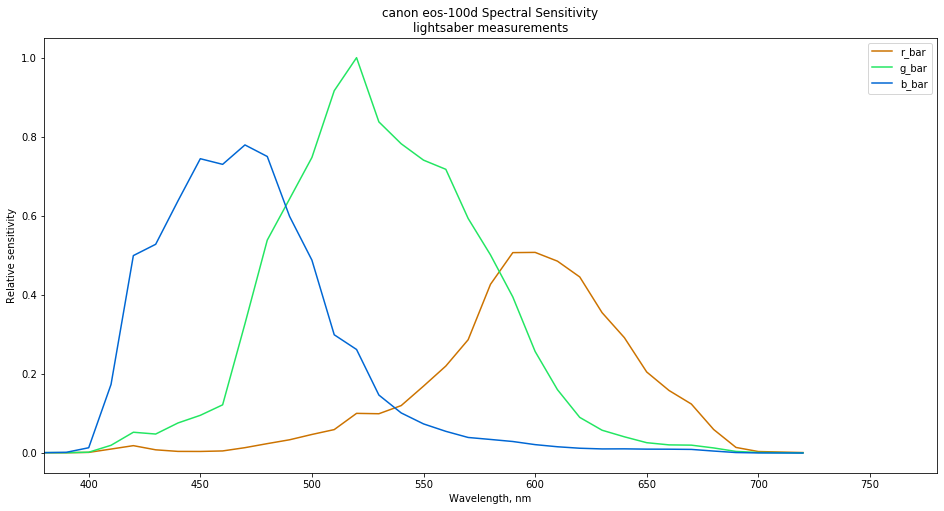

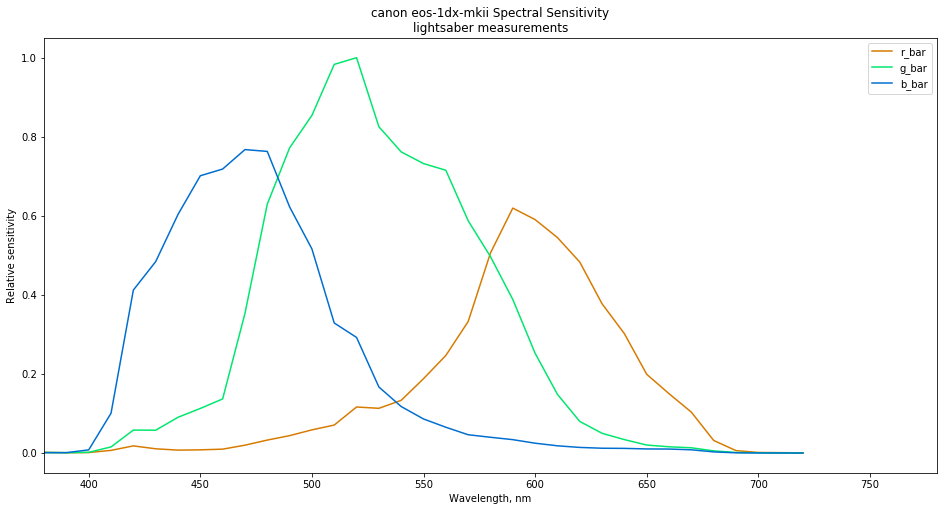

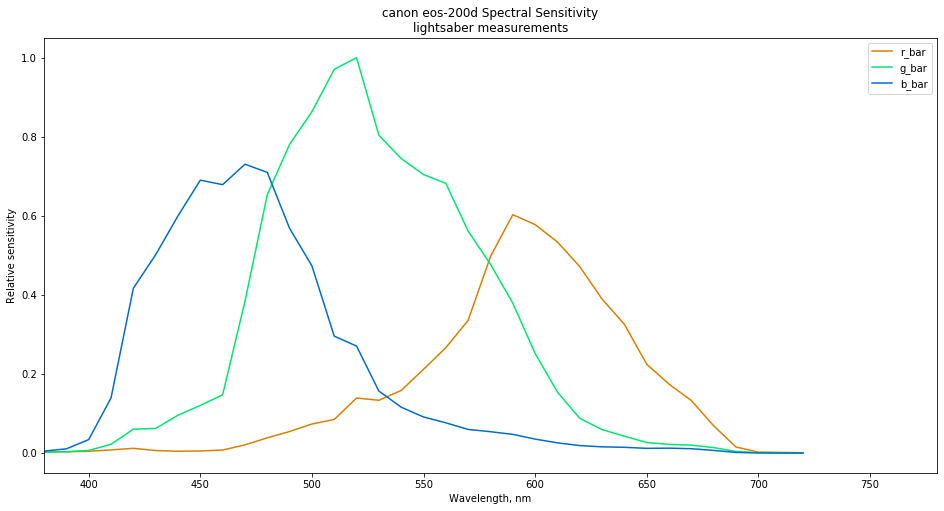

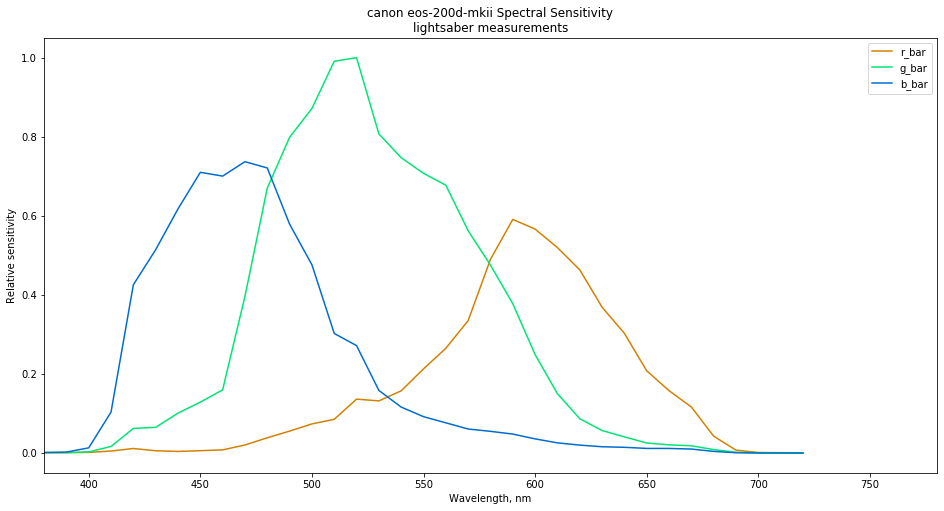

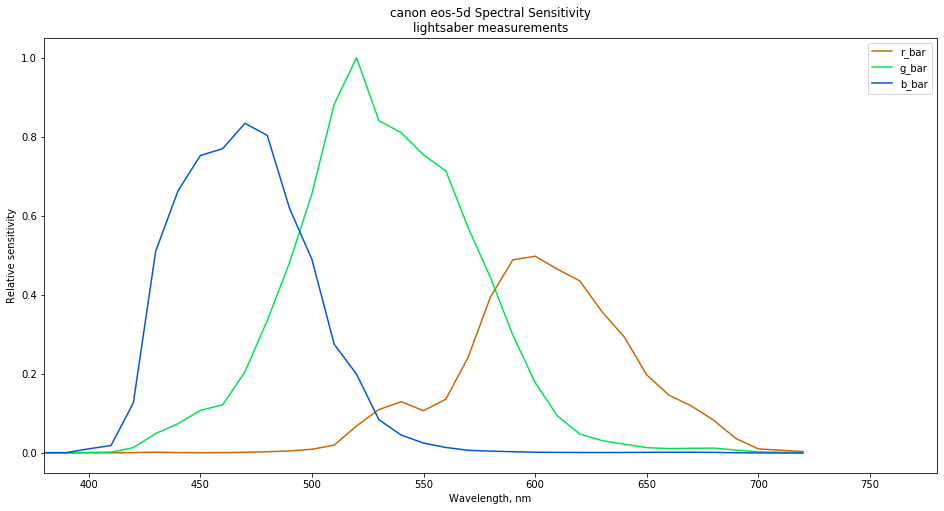

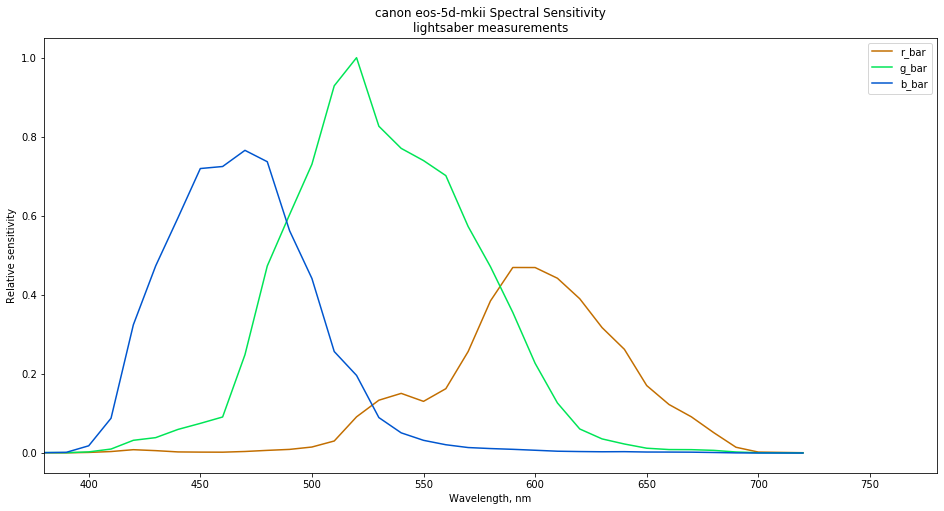

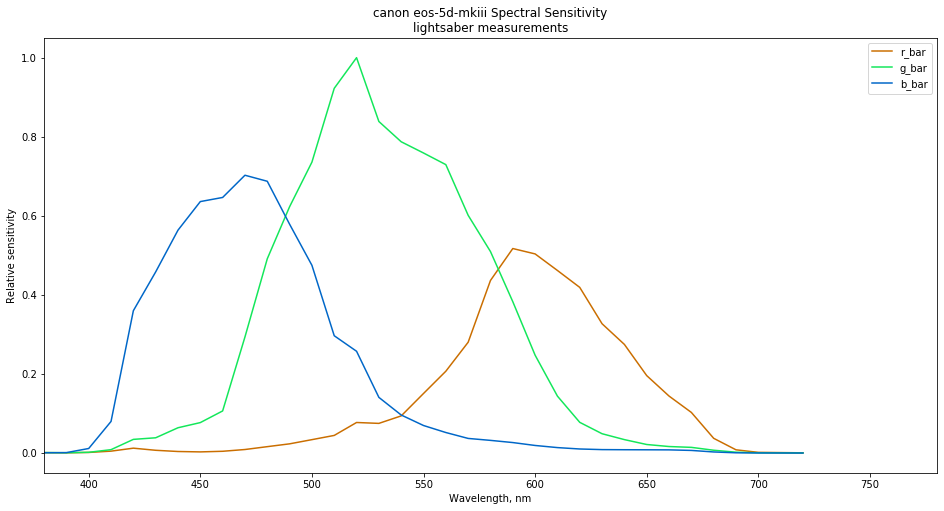

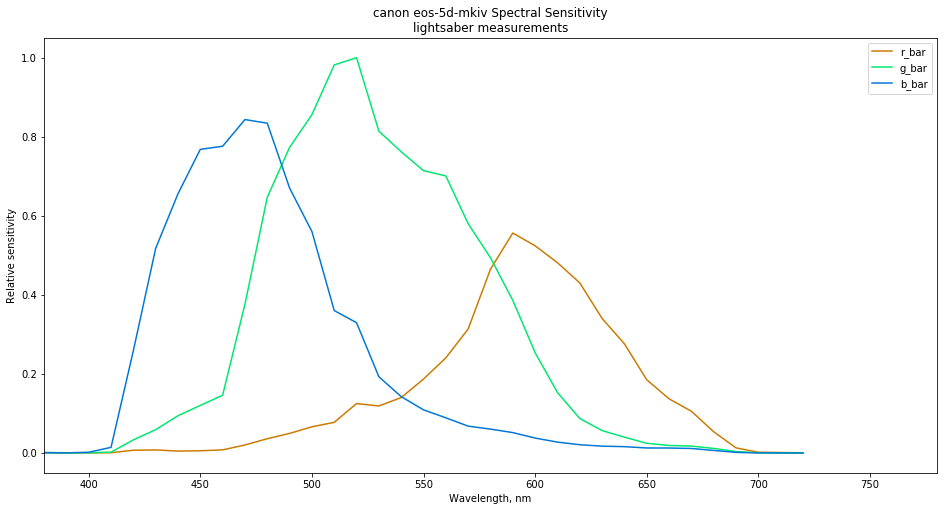

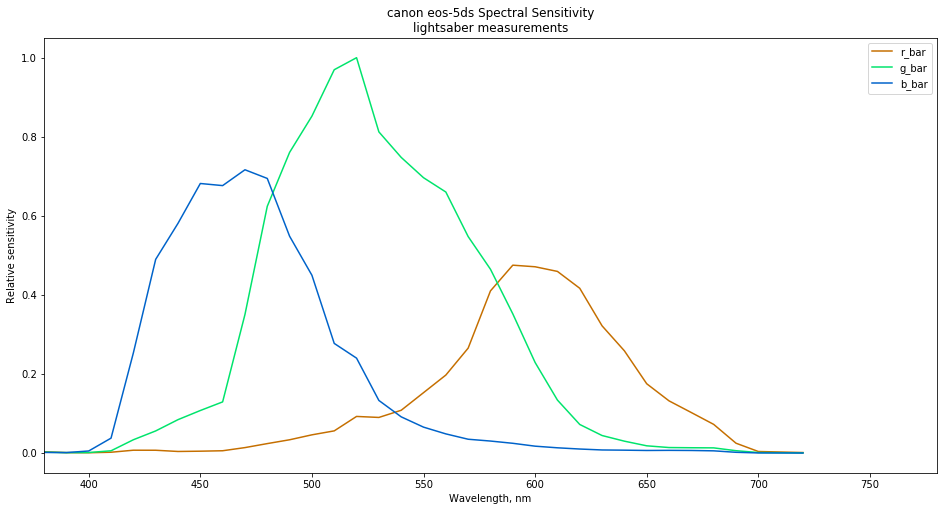

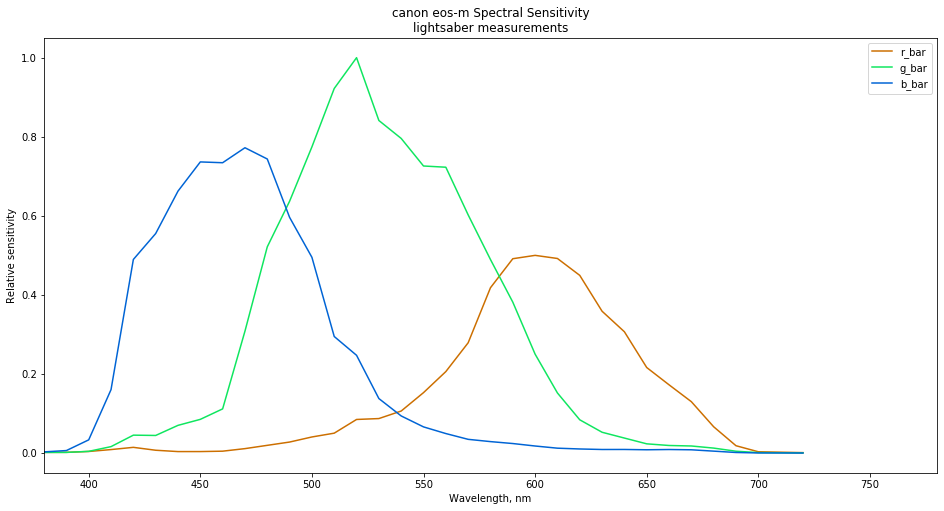

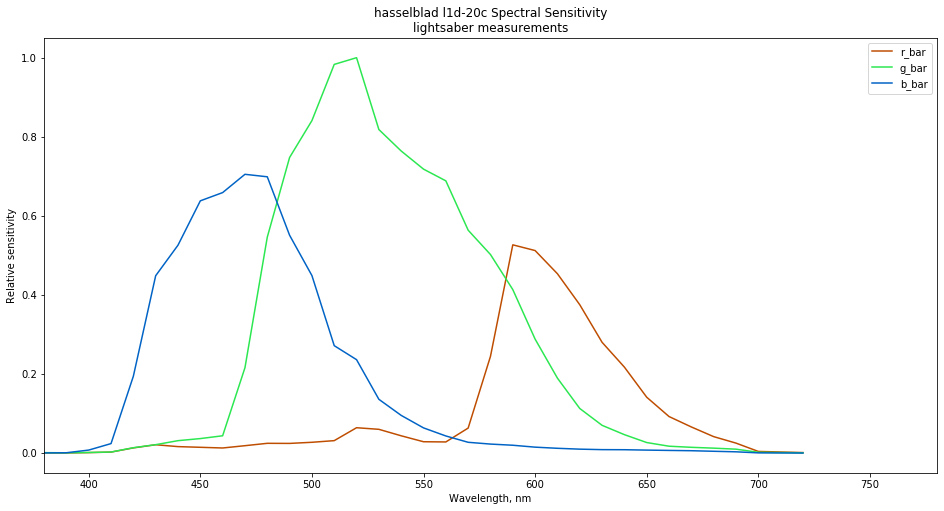

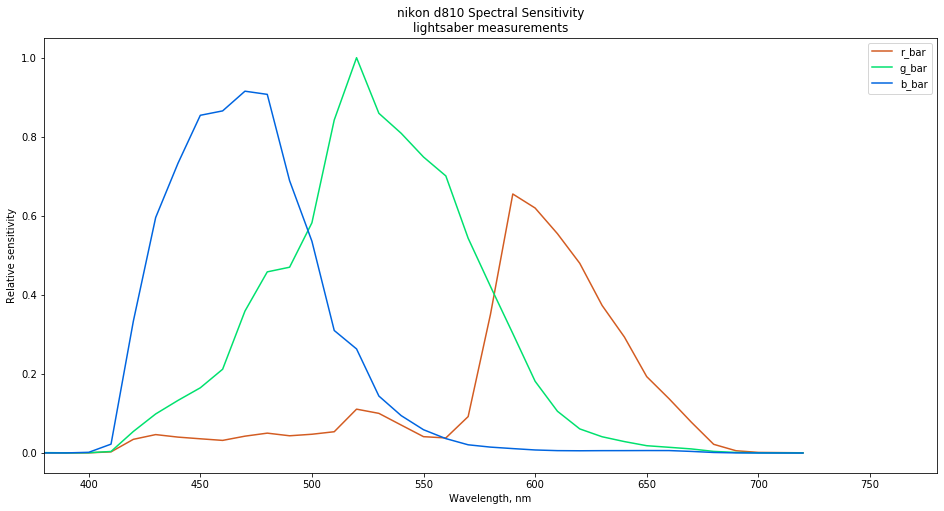

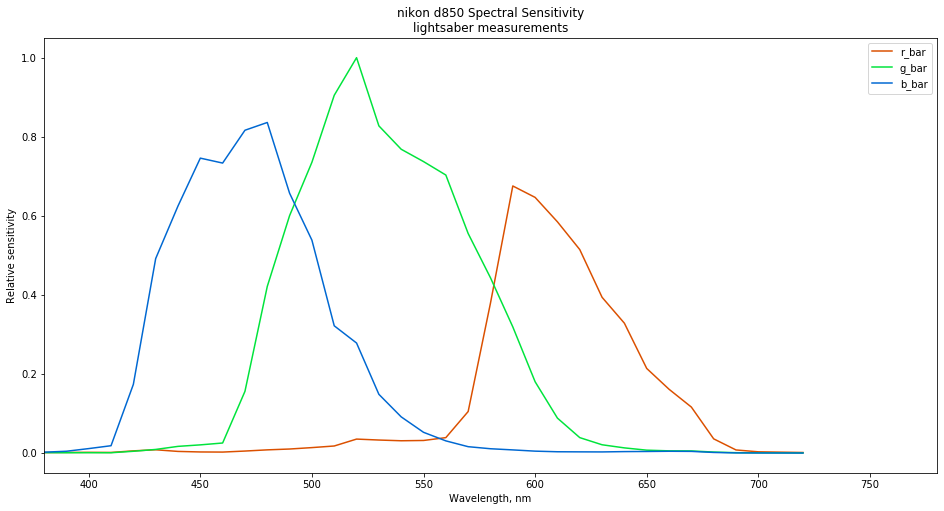

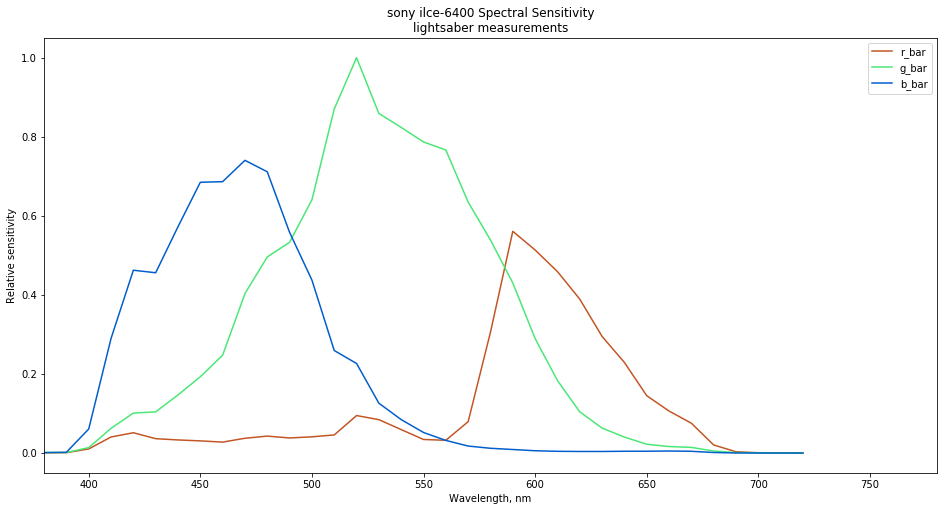

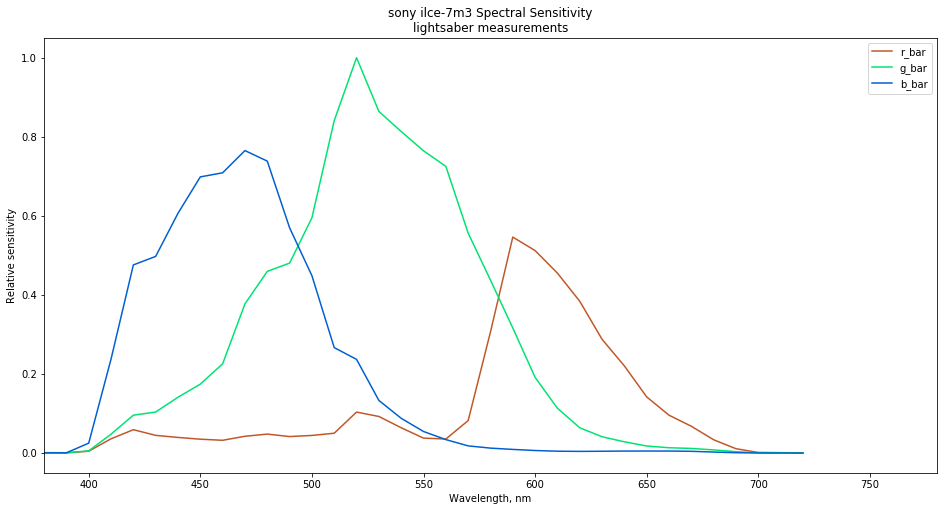

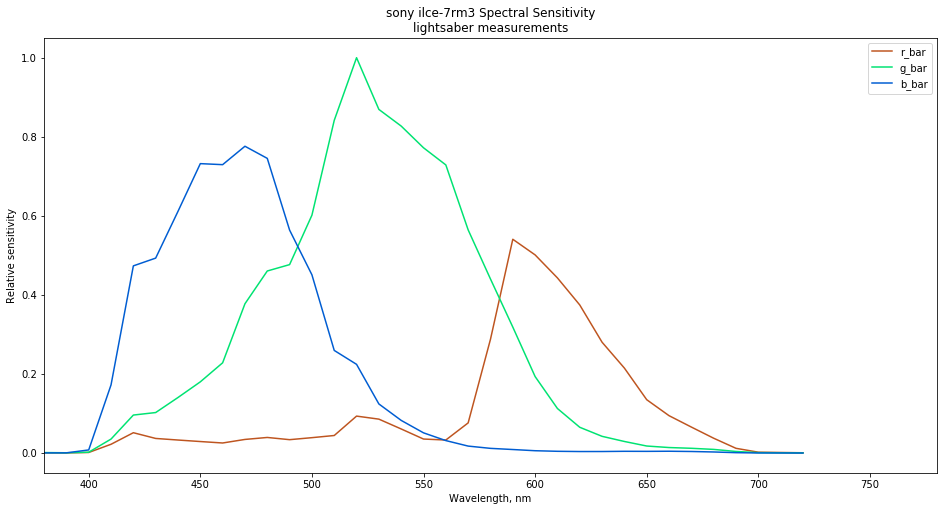

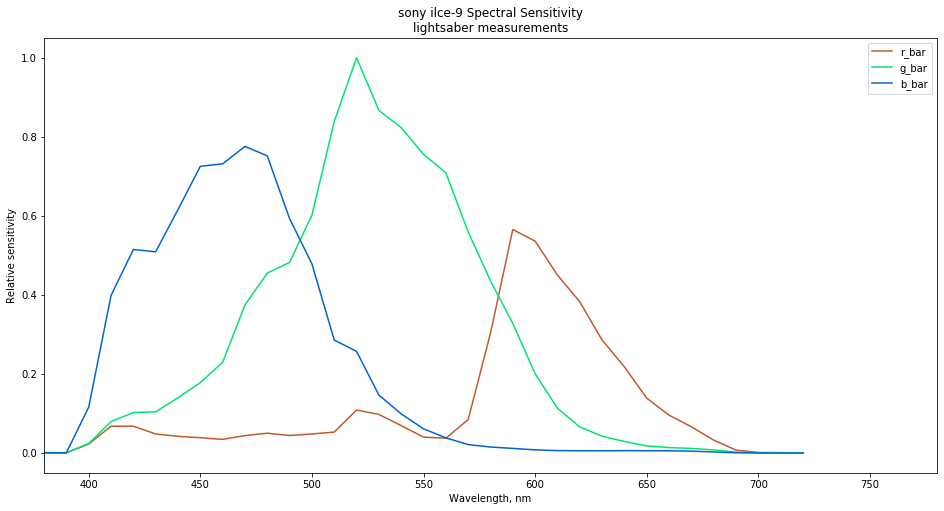

In [6]:
def draw_curves(json):
    # Plot the curves
    from colour import SpectralDistribution
    
    cmf_5d = MultiSpectralDistributions(json['spectral_data']['data']['main'], labels=['r_bar', 'g_bar', 'b_bar'])
    
    r = colour.sd_to_XYZ(SpectralDistribution(data=cmf_5d.values[:,0], domain=cmf_5d.wavelengths)) / 100
    r = np.clip(colour.XYZ_to_sRGB(r), 0, 1)
    g = colour.sd_to_XYZ(SpectralDistribution(data=cmf_5d.values[:,1], domain=cmf_5d.wavelengths)) / 100
    g = np.clip(colour.XYZ_to_sRGB(g), 0, 1)
    b = colour.sd_to_XYZ(SpectralDistribution(data=cmf_5d.values[:,2], domain=cmf_5d.wavelengths)) / 100
    b = np.clip(colour.XYZ_to_sRGB(b), 0, 1)

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_xlim(380, 780)
    ax.set_xlabel('Wavelength, nm')
    ax.set_ylabel('Relative sensitivity')
    ax.plot(cmf_5d.wavelengths, cmf_5d.values[:,0], color=r)
    ax.plot(cmf_5d.wavelengths, cmf_5d.values[:,1], color=g)
    ax.plot(cmf_5d.wavelengths, cmf_5d.values[:,2], color=b)
    plt.title('{} {} Spectral Sensitivity\n{} measurements'.format(
        json['header']['manufacturer'],json['header']['model'],
              json['header']['measurement_equipment']))
    plt.legend(['r_bar', 'g_bar', 'b_bar'])

draw_curves(load_camera_data('canon_eos-100d_380_720_10.json'))
draw_curves(load_camera_data('canon_eos-1dx-mkii_380_720_10.json'))
draw_curves(load_camera_data('canon_eos-200d_380_720_10.json'))
draw_curves(load_camera_data('canon_eos-200d-mkii_380_720_10.json'))
draw_curves(load_camera_data('canon_eos-5d_380_720_10.json'))
draw_curves(load_camera_data('canon_eos-5d-mkii_380_720_10.json'))
draw_curves(load_camera_data('canon_eos-5d-mkiii_380_720_10.json'))
draw_curves(load_camera_data('canon_eos-5d-mkiv_380_720_10.json'))
draw_curves(load_camera_data('canon_eos-5ds_380_720_10.json'))
draw_curves(load_camera_data('canon_eos-m_380_720_10.json'))
draw_curves(load_camera_data('hasselblad_l1d-20c_380_720_10.json'))
draw_curves(load_camera_data('nikon_d810_380_720_10.json'))
draw_curves(load_camera_data('nikon_d850_380_720_10.json'))
draw_curves(load_camera_data('sony_ilce-6400_380_720_10.json'))
draw_curves(load_camera_data('sony_ilce-7m3_380_720_10.json'))
draw_curves(load_camera_data('sony_ilce-7rm3_380_720_10.json'))
draw_curves(load_camera_data('sony_ilce-9_380_720_10.json'))